# Final exam

**Note:** Use these guidelines if and only if you are taking the **final exam**. If you are working on a **final project of your own design**, see the (separate) [final project guidelines](https://github.com/wilkens-teaching/info3350-s22/blob/main/final_exam/project.ipynb).

## Guidelines

This exam is for **undergraduates enrolled in INFO 3350**. If you are a graduate student enrolled in INFO 6350, you must complete a final project of your own design.

### The task

Your task is to: identify an interesting problem that's addressable with the help of computational methods applied to the supplied corpus, formulate a hypothesis about that problem, devise an experiment or experiments to test your hypothesis, present the results of your investigations, and discuss your findings.

This workflow essentially replicates the process of writing an academic paper. You can think of your exam as a paper in miniature.

You are free to present each component as you see fit. You should use free-form text (that is, your own writing in a markdown cell), citations of others' work, numerical results, tables of data, and static and/or interactive visualizations as appropriate. Total length is flexible and depends on the specific balance you strike between the ambition of your question and the sophistication of your methods. But be aware that numbers never, ever speak for themselves. Quantitative results presented without substantial discussion will not earn high marks. 

Your project should reflect, at minimum, ten or more hours of work, though you will be graded on the quality of your output, not the amount of time it took you to produce it.

#### Pick an important and interesting problem!

No amount of technical sophistication will overcome a fundamentally uninteresting problem at the core of your work. You have seen many pieces of successful computational humanities research over the course of the semester. You might use these as a guide to the kinds of problems that interest scholars in a range of humanities disciplines. You may also want to spend some time in the library, reading recent books and articles in the professional literature. **Problem selection and motivation are integral parts of the project.** Do not neglect them.

### The corpus

We have supplied you (via the course GitHub site) with a corpus of 1,540 volumes of American fiction published between 1789 and 1875, as well as a range of potentially relevant metadata. This corpus is large: it contains well over 100 million words. Some summary and descriptive statistics are included below, along with a short annotation of the metadata fields.

**Be aware that some (but certainly not all) text analysis tasks will be slow (or impossible) when run over a corpus as large as this one.** For comparison purposes, the album review dataset we used for homework 8 contained about 10% as many words (but a lot more total documents). You might consider whether or not your question requires the use of the full corpus.

Books in the corpus are those that were included in volumes 1 and 2 of Lyle Wright's three-volume bibliography of American fiction before 1900 and that were digitized by the University of Virginia (1789-1850) and Indiana University (1851-1875). This corpus includes about 40% of the American fiction from the period (1789-1875) that has been preserved in American academic libraries. You might think a little about what kinds of books are most likely to have found their way first into print and then into academic libraries, and what kinds of books (and authors) might not have.

Metadata were collected manually by a team of undergraduate students at the University of Notre Dame.

**Note that the nineteenth century was awful.** These books reflect that fact in all kinds of ways, even though (or maybe because) they were generally considered unproblematic at the time. If you read the books or dig very far into the most informative features, you will quickly discover objectionable content. It would be valuable to devise (and you will be rewarded for devising) methods to avoid displaying unmasked versions of racial slurs, for example, in any visualization that might otherwise include them.

### Format

You should submit your exam as a report in the form of a Jupyter notebook that includes all code, figures, and write-up.

Your report should have four basic sections (provided in cells below for ease of reference and reuse):

1. **Introduction and hypothesis.** What problem are you working on? Why is it interesting and important? What have other people said about it? What do you expect to find?
2. **Corpus, data, and methods.** What data have you used? What are the limitations of that data? What major methods will you use to analyze it? Why are those methods the appropriate ones?
3. **Results.** What did you find? How did you find it? How should we read your figures? Be sure to include confidence intervals or other measures of statistical significance or uncetainty where appropriate.
4. **Discussion and conclusions.** What does it all mean? Do your results support your hypothesis? Why or why not? What are the limitations of your study and how might those limitations be addressed in future work?

Within each of those sections, you may use as many code and markdown cells as you like. You may, of course, address additional questions or issues not listed above. You may also gather additional data or metadata relevant to your analysis, but you are not required to do so.

All code used in the project should be present in the notebook (except for widely-available libraries that you import), but **be sure that we can read and understand your report in full without rerunning the code**. Unexecuted code will receive no credit. Be sure, too, to explain what you're doing along the way, both by describing your data and methods and by writing clean, well commented code.

### Grading

This exam is the take-home final for the course. It is worth 20% of your overall grade. You will be graded on the quality and ambition of each aspect of the project. No single component is more important than the others.

### Practical details

* The exam is due at **11:59pm EST on Thursday, May 19, 2022** via upload of a single, fully executed Jupyter notebook file to CMS.
* **You must work alone.** You may not collaborate with others.
    * You may post questions on Ed, but should do so privately (visible to course staff only).
* Interactive visualizations do not always work when embedded in shared notebooks. If you plan to use interactives, you may need to host them elsewhere and link to them.

---

## 1. Introduction and hypothesis

As stated in the Norton reading in the discussion of religion and 19th century writers, "All the major writers found themslves at odds, with the dominant religion of their time; a nominal Protestant·Christianity which exerted practical control over what could be printed in books and magazines". Naturally, this raises some questions. What does it mean that "Protestant-Christianity exerted practical control over what could be printed"? Does this mean that the Protestant church explicity reviewed and made changes to books that had ideas that they didn't agree with, or does this mean that Protestant-Christianity, being the main religion at the time, caused an implicit bias in books, given that presumably the writers were Protestant Christian.

My hypothesis here is: Given that Protestant-Christianity exerted control over what could be printed in the 1800s, there should exist some level of bias present in the corpus regarding Protestant-Christianity. In particular, if this bias does exist, we should expect to see a positive/more favorable sentiment associated with Protestant-Christianity and a negative/less favorable sentiment associated with other religions. This is what I expect to find in this corpus.

## 2. Data and methods

### 2.1 Data Preprocessing + cleaning:

Since our Corpus is so large, it is not viable to store the corpus in RAM (random access memory). Additionally, for the purposes of training word embeddings, it isn't necessary to do a lot of text preprocessing and cleaning, as we do not need to remove stopwords or compute complex features from our corpus. This is because stop words provide some context/information to the word embedding model. So for now, let's read the filenames from the us_texts directory, and save them to a variable:

In [1]:
# Import

import os
from os import walk
import pandas as pd
import numpy as np
import re

from tqdm import tqdm
import random

# Define path to texts

text_dir = os.path.join('Data', 'us_fiction', 'us_texts')

# Get file names

filenames = next(walk(text_dir), (None, None, []))[2]

# Display Filename Stats

print(f"Number of files: {len(filenames)}")

Number of files: 1540


Later in this project, when we need to compute features from our corpus, we will use memory-safe functions that open and close each file in the corpus one at a time so that we do not run into memory errors or performance issues. 

### 2.2 Exploratory Data Analysis

Let's do an exploratory data analysis on this corpus to get a sense of this corpus. In particular, let's run a topic modeling algorithm to give us insight into what topics and ideas are common in these novels/books. For this topic modeling algorithm, lets random sample some sentences from each document to use as the training data. First, lets define some functions to randomly sample sentences from the corpus:

In [2]:
# Define Regex for tokenization

sent_split = re.compile('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')

# Define regex token

def sent_splitter(text):
    """
    Parses a text into sentennces using regex
    
    Parameters:
        text (string): text to be tokenized
        
    Returns:
        list of string
    """
    
    # Find all sents
    
    sents = re.split(sent_split, text)
    
    # return
    
    return sents

class CorpusFileIterator():
    """
    Iterator for our corpus which yields each documentas a string
    
    Attributes:
        None
    Methods:
        __iter__: generator function which yields each document as a string
    """
    
    def __len__(self):
        return len(filenames)

    def __iter__(self):
        """
        Iterates over documents in our corpus, yielding documents 
        
        Parameters:
            None
        Yields:
            String
        """
        
        # Create tqdm progress bar
        
        prog = tqdm(filenames)
        
        # Iterate over filenames
        
        for file in prog:
            
            # Clear tqdm
            
            tqdm._instances.clear()
            
            # Set progress bar description
            
            prog.set_description(f"Current Doc: {filenames.index(file) + 1} / {len(filenames)}")
            
            # Open text
            
            with open(text_dir + "\\" + file, encoding='utf-8') as f:
                
                # Split into sentences
                
                doc = sent_splitter((f.read()).lower())
                
                # Sample
                
                if len(doc) < 100:
                    sent_sample = doc
                else: 
                    sent_sample = random.sample(doc, 100)
                
                # Remove punctuation
                
                sent_sample = [re.sub(r'[^\w\s]', ' ', sent) for sent in sent_sample]
                
                # Read file and lowercase and yield
                
                yield sent_sample      

Now, lets generate our training data for our topic model:

In [3]:
# Instantiate empty array 

sents_for_topic_model = []

# Genereate Training Data using CorpusFileIterator

for sent_sample in CorpusFileIterator():
    
    # append sentence sample
    
    sents_for_topic_model = sents_for_topic_model + sent_sample

Current Doc: 1540 / 1540: 100%|██████████| 1540/1540 [00:34<00:00, 44.90it/s]


In [4]:
# Print # of training examples

print(f"Number of training examples: {len(sents_for_topic_model)}")

Number of training examples: 153977


Now that we have the training data, let's create and fit a topic model using this training data. I am using the `BERTopic` algorithm, as I have prior experience with its use, and it produces easily interpretable results. This topic modeling algorithm utilizes the `BERT` language model as part of its algorithm. 

In [5]:
# Import BERTopic

from bertopic import BERTopic

# Create new topic_model

topic_model = BERTopic(verbose=True)

# Fit Transform

topics, probabilities = topic_model.fit_transform(sents_for_topic_model)

Batches:   0%|          | 0/4812 [00:00<?, ?it/s]

2022-05-18 20:18:00,626 - BERTopic - Transformed documents to Embeddings
2022-05-18 20:19:21,577 - BERTopic - Reduced dimensionality with UMAP
2022-05-18 20:19:33,317 - BERTopic - Clustered UMAP embeddings with HDBSCAN


Let's look at some basic topic information in our model:

In [6]:
# Print Topic Info

topic_model.get_topic_info()

Topic  Count                                          Name
0        -1  96890                             -1_and_of_the_her
1         0   2725                    0_captain_boat_ship_vessel
2         1   1328                         1_mind_his_himself_he
3         2   1240                   2_judge_prisoner_court_jury
4         3    921                  3_horse_horses_rider_mounted
...     ...    ...                                           ...
1025   1041     10            1041_enough_acting_readily_english
1023   1039     10       1039_soldier_picket_soldieryou_secessia
1022   1044     10                 1044_poh_solaces_maw_creature
1021   1038     10            1038_lopez_diego_spanish_fernandez
1052   1051     10  1051_uncongeniality_pice_intreaties_hardwick

[1053 rows x 3 columns]

In [7]:
# Print a Random Topic

topic_model.get_topic(100)

[('women', 0.03705420632647676),
 ('sex', 0.020020395431194687),
 ('rights', 0.01440895252778012),
 ('sexes', 0.011660879234496947),
 ('woman', 0.009833185666949323),
 ('men', 0.009152736427798493),
 ('ladies', 0.00772314434161125),
 ('masculine', 0.0075947174917032805),
 ('inequality', 0.007525512062181753),
 ('females', 0.0062556113402847955)]

Let's search for topics which contain words associated with religion. First, let's define a list of religion associated words in our corpus:

In [8]:
# Define list of religions:

religion_associated_words = ["mormon", "mormons", 'mormonism', 'protestant', 'protestants', 'catholic', 'catholicism', 'muslim', 'islam'
                            'baptist', 'puritan', 'presbyterian', 'pagan', 'paganism', 'jew', 'judaism', 'pope', 'vatican', "church", "temple"
                            'saint', 'bishop', 'clergy', 'jesus' 'god', 'allah', 'presbytery', 'calvinism', 'calvinist', 'pastor', 'preacher' 
                            'minister', 'sermon']

Now, lets look for topics which include any of these words:

In [9]:
# Instantiate empty topic list

religion_associated_topics = []

# Iterate over topics

for topic in topic_model.get_topics():
    
    # Get words and tfidf probabilities for topic
    
    words, probs = zip(*topic_model.get_topic(topic))
    
    # Iterate over words in topic
    
    for each in words:
        
        # If a word is a religion associated word
        
        if each in religion_associated_words: 
            
            # Append
            
            religion_associated_topics.append(topic)
            
            # break
            
            break
            
print(f"Religion Associated Topics: {len(religion_associated_topics)}")

Religion Associated Topics: 9


Topics 21, 135, 150, 197, 265, 482, 541 are the topics in our topic model which contain words associated with religion. Lets look at these topics more indepth. First, lets get the topic information of each topic:

In [10]:
# Iterate over religion_associated_topics

for each in religion_associated_topics:
    
    # Print topic information

    word, probs = zip(*topic_model.get_topic(each))
    
    print(f"Topic #: {each} | Words: {word}")

Topic #: 13 | Words: ('church', 'clergyman', 'preacher', 'sermon', 'churches', 'catholic', 'episcopal', 'pastor', 'pulpit', 'preaching')
Topic #: 142 | Words: ('sabbath', 'sunday', 'sabbaths', 'jewish', 'worship', 'day', 'religious', 'church', 'worshipper', 'dealings')
Topic #: 147 | Words: ('church', 'bible', 'convictions', 'religious', 'christian', 'holy', 'covenants', 'gospel', 'faith', 'god')
Topic #: 164 | Words: ('quaker', 'puritan', 'quakers', 'puritans', 'quakeress', 'persecution', 'danforths', 'telie', 'puritanical', 'neighboring')
Topic #: 219 | Words: ('baptism', 'baptized', 'immersion', 'infant', 'baptize', 'church', 'baptizing', 'infants', 'apostles', 'membership')
Topic #: 343 | Words: ('mormon', 'brigham', 'mormons', 'utah', 'mormonism', 'saints', 'salt', 'revelashun', 'emigrants', 'lake')
Topic #: 466 | Words: ('congregation', 'pews', 'pew', 'church', 'crowded', '20', 'meeting', 'pulpit', 'polonius', 'trisagion')
Topic #: 477 | Words: ('jew', 'jews', 'vhen', 'vat', 'te'

Lets plot the freqencies of these topics:

In [11]:
# Import Plotting Library

import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate count_dict

count_dict = {}

# Iterate over religion topics

for each in religion_associated_topics:
    
    # Append
    
    count_dict[each] = topic_model.get_topic_freq(each)
    
# Plot

keys = list(count_dict.keys())
vals = [count_dict[k] for k in keys]
                                                               
sns.set(rc = {'figure.figsize':(15,8)})
                                                               
sns.barplot(x=keys, y=vals).set(title="Frequencies of Religion Topics")

plt.show()

Let's Plot these topics on an Intertopic Distance Map:

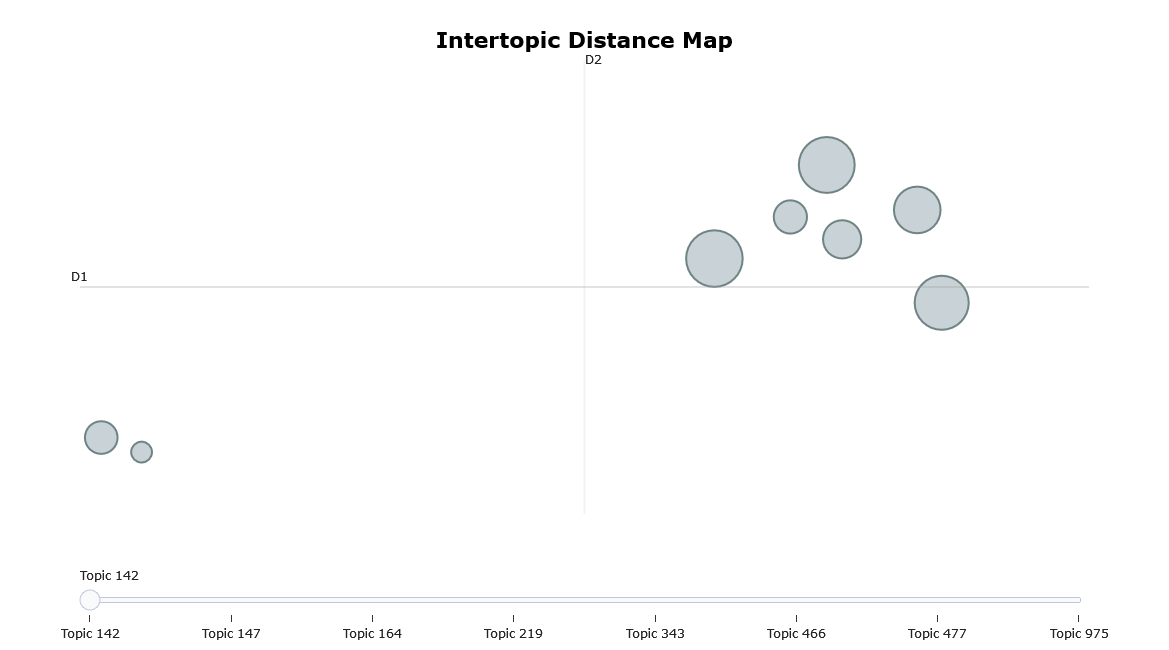

In [12]:
# Visualize the religion associated topics

topic_model.visualize_topics(religion_associated_topics)

From the words which are associated with each of these topics, we can divine some interesting things about what in particular is being discussed in relation to religion. The topics about religions which have emerged in this model are associated with religions: Catholicism, Judaism, Mormonism, Quakers, Puritans. These are likely the most common religions which are discussed in our corpus. 

Overall, whereas usage of this topic model does not give insight into every topic associated with religion, it has given some insight into what in regards to religion is being discussed in the books in this corpus. 

Garbage Collection to save memory:

In [13]:
# Import gc

import gc

# Delete Topic Model and Training data

del topic_model
del sents_for_topic_model

# Garbage collect

gc.collect()

48006

### 2.3: Creating and Training A Word2Vec Embedding Model

For training the primary embedding model, I will use the `Word2Vec` package from `gensim`. Word2Vec is a popular neural-network based word embedding algorithm which was developed in 2013. It is training by predicted words which appear close together. By training in this manner, Word2Vec is able to capture semantical relationships which are present in language. First, lets import the necessary packages for creating and training a Word2Vec Model:

In [14]:
# Import Packages

from gensim.test.utils import datapath
from gensim import utils
import re
import gensim
from gensim.models.callbacks import CallbackAny2Vec
from tqdm import tqdm

Now, let's define a couple of classes which we will utilize during training. In particular, we need to define two different classes. The first class, `callback` will contain a method which will be called on every training cycle's (epoch's) end. The second class, `Corpus`, is a generator which will yield training examples from our corpus. This generator is necessary, as it will only load one document into memory at a time, causing our model training to be faster. Let's define these two functions, and a regular expression we will use for word tokenization:

In [25]:
# Define Regex for word tokenization

WORD = re.compile(r'\w+')

# Define Callback class

class callback(CallbackAny2Vec):
    '''
    Callback to print loss after each epoch.
    
    Attributes:
        epoch (int): training epoch number
        
    Methods:
        on_epoch_end: prints training info at the end of each epoch
    '''

    def __init__(self):
        """
        Initializes callback class
        
        Parameters:
            None
        Returns:
            None
        """
        
        # Instantiate epoch as 1
        
        self.epoch = 1

    def on_epoch_end(self, model):
        """
        Prints training info at the end of each epoch
        
        Parameters:
            model: Word2Vec model
        Returns:
            None
        """
        
        # Get Training Loss
        
        loss = model.get_latest_training_loss()
        
        # Print Epoch training info
        
        print(f'Finished training epoch: {self.epoch} | Loss: {loss}')
        
        # Increment epoch by 1
        
        self.epoch += 1
        
# Define a class for our Corpus
        
class Corpus:
    """
    Iterator for our corpus which yields lists of tokens for each document
    
    Attributes:
        None
    Methods:
        __iter__: generator function which yields lists of tokens for each documents
    """
    
    def __len__(self):
        return len(filenames)

    def __iter__(self):
        """
        Iterates over documents in our corpus, yielding tokenized documents 
        
        Parameters:
            None
        Yields:
            List of String
        """
        
        # Create tqdm progress bar
        
        prog = tqdm(filenames)
        
        # Iterate over filenames
        
        for file in prog:
            
            # Clear tqdm
            
            tqdm._instances.clear()
            
            # Set progress bar description
            
            prog.set_description(f"Current Doc: {filenames.index(file) + 1} / {len(filenames)}")
            
            # Open text
            
            with open(text_dir + "\\" + file, encoding='utf-8') as f:
                
                # Read file and lowercase
                
                doc = (f.read()).lower()
                
                # Tokenize
                
                tokens = WORD.findall(doc)
                
                # Yield list of tokens
                
                yield tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's train our `Word2Vec` model on the corpus. For the model hyperparameters, I decided to set the embedding size to 100 and the window size equal to 10. I thought that having a window size of 10 would be a good size for the model, as with a window size of 10, the training data would have a good mix of closer context words as well as farther context words, which would hopefully result in relationships between farther distance words being encoded into the final model. 

In [26]:
# Instantiate New Corpus Object

sentences = Corpus()

# Create Model and Train

model = gensim.models.Word2Vec(sentences=sentences, workers=8, size=100, window=10, min_count=1, 
                 compute_loss=True, callbacks=[callback()])

Current Doc: 1540 / 1540: 100%|██████████| 1540/1540 [00:35<00:00, 43.96it/s]


Finished training epoch: 1 | Loss: 17425538.0


Current Doc: 1540 / 1540: 100%|██████████| 1540/1540 [00:34<00:00, 44.31it/s]


Finished training epoch: 2 | Loss: 29777742.0


Current Doc: 1540 / 1540: 100%|██████████| 1540/1540 [00:34<00:00, 44.21it/s]


Finished training epoch: 3 | Loss: 38180912.0


Current Doc: 1540 / 1540: 100%|██████████| 1540/1540 [00:35<00:00, 43.21it/s]


Finished training epoch: 4 | Loss: 44512548.0


Current Doc: 1540 / 1540: 100%|██████████| 1540/1540 [00:34<00:00, 45.03it/s]

Finished training epoch: 5 | Loss: 50250964.0


Now, as a sanity check, lets look at some word vectors and find similar words:

In [31]:
# Print word vec for protestant

print(f"Word Vector for Protestant: {model.wv['protestant']} \n")

print(f"Word Vector for Catholic: {model.wv['catholic']} ")

Word Vector for Protestant: [-0.5566165  -1.1217518   0.25460282  0.9956302  -0.06721873  0.6241701
 -1.2263393   0.21583459 -0.22683336  1.1456994   0.12490879  0.25651845
 -0.15670317 -0.02681368 -0.6926674   0.23002438  0.08913026 -0.09374256
 -0.06305896  0.53038365 -1.193644   -0.05019728  0.59692883 -0.4294211
 -1.1427269  -0.14323692 -0.10794561  0.7747534  -0.54762053 -0.6064058
  0.768425    0.00210834 -0.5323127  -0.07865568 -0.11492728 -0.5289991
  0.49169704  0.0526902   0.49284688 -1.4475753   0.16231948  0.36617666
  0.14455418 -1.4509294   0.65867853  0.8831081   1.2479069   0.02769497
  0.4175572   1.2517433  -0.22265783  0.44572818 -0.0248806   0.9810733
  0.02856239 -0.35169524  0.4201564   0.05848296 -0.6154658  -1.5327072
  0.45153442 -0.16911973  1.1569467  -0.18154691 -0.27199823 -0.24088852
  0.9684133   1.1343168  -0.42937702 -0.4114361   0.8445264  -0.19056079
  0.10788113 -1.0581019  -0.43614072 -1.3200543   0.10932966 -0.21836004
  0.01644708 -0.22694778  0.6

## 3. Results

Now that we have created and trained a word embedding model on our corpus, we can use this embedding model as a means of calculating bias/sentiment. Let's define a list of various religion associated words that exist in the word embedding model's vocabulary:

In [33]:
# Define religion associated words

religion_associated_words = ["mormon", "mormons", 'mormonism', 'protestant', 'protestants', 'catholic', 'catholicism', 'muslim', 'islam'
                            'baptist', 'puritan', 'presbyterian', 'pagan', 'paganism', 'jew', 'judaism', 'pope', 'vatican', "church", "temple"
                            'saint', 'bishop', 'clergy', 'jesus' 'god', 'allah', 'presbytery', 'calvinism', 'calvinist']

# Instantiate empty 

religion_words_in_vocabulary = []

# Iterate over words

for each in religion_associated_words:
    
    # If word is in vocab
    
    if each in model.wv.vocab:
        
        # Append
        
        religion_words_in_vocabulary.append(each)
        
# Print words in vocabulary
    
print(f"Religion words in vocabulary: {religion_words_in_vocabulary}")

Religion words in vocabulary: ['mormon', 'mormons', 'mormonism', 'protestant', 'protestants', 'catholic', 'catholicism', 'muslim', 'puritan', 'presbyterian', 'pagan', 'paganism', 'jew', 'judaism', 'pope', 'vatican', 'church', 'bishop', 'clergy', 'allah', 'presbytery', 'calvinism', 'calvinist']


Let's also compile words associated with various sentiments. I used the eight emotional catogories present in the NRC lexicon, and I used positive and negative word sentiment lexicons from:  http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

In [40]:
# Emotion words

emotions_list = ['fear', 'anger', 'trust', 'sadness', 'disgust', 'anticipation', 'joy', 'surprise']

# Positive Words

with open('positive_sentiment_lexicon.txt', encoding='utf-8') as f:
                
    # Read file and lowercase
                
    doc = (f.read()).lower()
                
    # Tokenize
                
    positive_words = WORD.findall(doc)
        
# Show positive words

print(f"Positive words: {positive_words[10:20]}")

# Negative Words

with open('negative_sentiment_lexicon.txt', encoding='utf-8') as f:
                
    # Read file and lowercase
                
    doc = (f.read()).lower()
                
    # Tokenize
                
    negative_words = WORD.findall(doc)
    
# Show negative words

print(f"Negative words: {negative_words[10:20]}")

Positive words: ['accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately']
Negative words: ['abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent']


Now, lets create word vectors for the religion words, as well as the sentiment words. The positive and negative word vectors will be averages of all the word vectors of words in their respective lexicons. 

In [64]:
# Instantiate empty religion word vec dict

religion_vec_dict = {}

# Iterate over religion words

for each in religion_words_in_vocabulary:
    
    # Add word vector
    
    religion_vec_dict[each] = model.wv[each]
    
    
# Create sentiment vector dict
    
sentiment_dict = {}

# Iterate over emotions list

for each in emotions_list:
    
    # Add word vector
    
    sentiment_dict[each] = model.wv[each]
    
# Create positive word Vec
    
positive_word_vecs = [model.wv[each] for each in positive_words if each in model.wv.vocab]

# Add to sentiment Dict
    
sentiment_dict['positive'] = np.mean(positive_word_vecs, axis=0)

# Create negative word vec

negative_word_vecs = [model.wv[each] for each in negative_words if each in model.wv.vocab]

# Add to sentiment dict

sentiment_dict['negative'] = np.mean(negative_word_vecs, axis=0)

# Print

print(f"Religion Word Vector for Protestant: {religion_vec_dict['protestant']} \n")

print(f"Sentiment Word Vectors: {sentiment_dict}")

Religion Word Vector for Protestant: [-0.5566165  -1.1217518   0.25460282  0.9956302  -0.06721873  0.6241701
 -1.2263393   0.21583459 -0.22683336  1.1456994   0.12490879  0.25651845
 -0.15670317 -0.02681368 -0.6926674   0.23002438  0.08913026 -0.09374256
 -0.06305896  0.53038365 -1.193644   -0.05019728  0.59692883 -0.4294211
 -1.1427269  -0.14323692 -0.10794561  0.7747534  -0.54762053 -0.6064058
  0.768425    0.00210834 -0.5323127  -0.07865568 -0.11492728 -0.5289991
  0.49169704  0.0526902   0.49284688 -1.4475753   0.16231948  0.36617666
  0.14455418 -1.4509294   0.65867853  0.8831081   1.2479069   0.02769497
  0.4175572   1.2517433  -0.22265783  0.44572818 -0.0248806   0.9810733
  0.02856239 -0.35169524  0.4201564   0.05848296 -0.6154658  -1.5327072
  0.45153442 -0.16911973  1.1569467  -0.18154691 -0.27199823 -0.24088852
  0.9684133   1.1343168  -0.42937702 -0.4114361   0.8445264  -0.19056079
  0.10788113 -1.0581019  -0.43614072 -1.3200543   0.10932966 -0.21836004
  0.01644708 -0.2269

Let's define some similarity scores which we can use to calculate sentiment scores for various religion associated workds:

In [72]:
def cosine_similarity(vec1, vec2):
    """
    Finds cosine similarity
    
    Parameters:
        vec1: first word vector
        vec2: second word vector
    
    Returns:
        Float
    """
    
    cos_sim = np.dot(vec1, vec2)/np.linalg.norm(vec1)* np.linalg.norm(vec2)
    
    return cos_sim

def pos_neg_sentiment_score(word_vec, pos_vec=sentiment_dict['positive'], neg_vec=sentiment_dict['negative']):
    """
    Calculates positive-negative sentiment score
    """

    sentiment_direction = pos_vec - neg_vec
    
    sentiment_direction /= np.linalg.norm(sentiment_direction)
    
    # calculate sentiment score based on whether the word vector is closer to positive or negative word vector
    
    pos_neg_sentiment_score = sentiment_direction @ word_vec
    
    # Return 
    
    return pos_neg_sentiment_score

Now, lets calculate sentiment scores based on these word embeddings and create a dataframe to hold these various scores:

In [90]:
# Import

import pandas as pd
import scipy
from   sklearn.metrics.pairwise import euclidean_distances, cosine_distances

# Create Column Names

column_names = ['word', 'fear_cos_sim', 'anger_cos_sim', 'trust_cos_sim', 'sadness_cos_sim', 'disgust_cos_sim',
                'anticipation_cos_sim', 'joy_cos_sim', 'surprise_sim', 'positive_cos_sim', 'negative_cos_sim','positive_negative_score']

# Create empty dataframe

religion_word_sentiments = pd.DataFrame(columns = column_names)

# Iterate over words and vectors in dictionary

for word, vector in religion_vec_dict.items():
    
    # Create new row
    
    row = [word]
    
    # Iterate over sentiments and sentiment vectors
    
    for sentiment, sent_vector in sentiment_dict.items():
        
        # Append cosine similarity between word and sentiment 
        
        row.append(1 - scipy.spatial.distance.cosine(vector, sent_vector))
        
    # Append Positive-Negative sentiment score
        
    row.append(pos_neg_sentiment_score(vector))
    
    # Add Row
        
    religion_word_sentiments.loc[len(religion_word_sentiments.index)] = row
    
# Display Head

religion_word_sentiments.head()

word  fear_cos_sim  anger_cos_sim  trust_cos_sim  sadness_cos_sim  \
0       mormon     -0.163971      -0.293456      -0.003178        -0.210833   
1      mormons     -0.141087      -0.289079      -0.155047        -0.113750   
2    mormonism     -0.081459      -0.156838      -0.095592        -0.062931   
3   protestant     -0.007617      -0.099699       0.171365        -0.176367   
4  protestants      0.068358       0.020514       0.067321        -0.120049   

   disgust_cos_sim  anticipation_cos_sim  joy_cos_sim  surprise_sim  \
0        -0.155983             -0.120718    -0.120878     -0.157418   
1        -0.091299             -0.052194    -0.113991     -0.104435   
2         0.064483              0.002748    -0.200604     -0.157892   
3        -0.083104             -0.128707    -0.071363     -0.122026   
4         0.050278             -0.044782    -0.064664     -0.094930   

   positive_cos_sim  negative_cos_sim  positive_negative_score  
0          0.165756         -0.052720                 1.051470  
1          0.252106          0.095822                 0.683135  
2          0.373955          0.397538                 0.192067  
3          0.351834          0.117808                 2.111221  
4          0.371980          0.297843                 0.854855

Let's look at all of the calculated scores:

In [91]:
religion_word_sentiments.head(len(religion_word_sentiments.index))

word  fear_cos_sim  anger_cos_sim  trust_cos_sim  sadness_cos_sim  \
0         mormon     -0.163971      -0.293456      -0.003178        -0.210833   
1        mormons     -0.141087      -0.289079      -0.155047        -0.113750   
2      mormonism     -0.081459      -0.156838      -0.095592        -0.062931   
3     protestant     -0.007617      -0.099699       0.171365        -0.176367   
4    protestants      0.068358       0.020514       0.067321        -0.120049   
5       catholic      0.017141      -0.044790       0.136518        -0.077763   
6    catholicism     -0.054591      -0.037342      -0.110418         0.093451   
7         muslim     -0.177539      -0.051133      -0.127364         0.071576   
8        puritan     -0.023664       0.039462       0.024436         0.109088   
9   presbyterian     -0.199695      -0.223189       0.032015        -0.175988   
10         pagan      0.115062       0.045598       0.129757         0.015971   
11      paganism      0.115152       0.079947       0.035350         0.070136   
12           jew      0.075059       0.188626       0.091478        -0.049667   
13       judaism      0.107106       0.007688       0.120035         0.005861   
14          pope     -0.117810      -0.026756       0.084662        -0.092116   
15       vatican     -0.094840      -0.045836      -0.112929         0.081614   
16        church     -0.032504      -0.119467       0.027186        -0.054902   
17        bishop     -0.096509       0.038637       0.079566        -0.108582   
18        clergy     -0.024174      -0.001620       0.086280        -0.158712   
19         allah      0.211731       0.207822       0.285979         0.028499   
20    presbytery     -0.023128      -0.076647       0.128078        -0.171833   
21     calvinism      0.183462       0.110293       0.141075         0.051314   
22     calvinist     -0.039537      -0.012097      -0.057142         0.082936   

    disgust_cos_sim  anticipation_cos_sim  joy_cos_sim  surprise_sim  \
0         -0.155983             -0.120718    -0.120878     -0.157418   
1         -0.091299             -0.052194    -0.113991     -0.104435   
2          0.064483              0.002748    -0.200604     -0.157892   
3         -0.083104             -0.128707    -0.071363     -0.122026   
4          0.050278             -0.044782    -0.064664     -0.094930   
5         -0.097142             -0.124823    -0.011695     -0.133120   
6          0.119189              0.107983     0.050807     -0.131070   
7         -0.058191             -0.026745    -0.063970     -0.067946   
8          0.080760             -0.028413     0.003847     -0.087900   
9         -0.177587             -0.134653    -0.125672     -0.145477   
10         0.022896             -0.076761     0.065374     -0.244162   
11         0.225744              0.138569     0.098218     -0.035242   
12         0.199355             -0.233221    -0.104821      0.164499   
13         0.010900              0.119282     0.045845     -0.091068   
14        -0.023643             -0.028036     0.035903     -0.081500   
15        -0.002051              0.037372     0.048084     -0.017669   
16        -0.143928              0.010789     0.039975     -0.109637   
17        -0.048653             -0.089579     0.017852      0.095063   
18         0.011829             -0.056237    -0.106445     -0.149702   
19         0.050192              0.017971     0.300783      0.021305   
20         0.005196              0.002125    -0.048977      0.039837   
21         0.101501             -0.058210    -0.104955     -0.179309   
22         0.053159             -0.085513    -0.004536     -0.070723   

    positive_cos_sim  negative_cos_sim  positive_negative_score  
0           0.165756         -0.052720                 1.051470  
1           0.252106          0.095822                 0.683135  
2           0.373955          0.397538                 0.192067  
3           0.351834          0.117808                 2.111221  
4       

## 4. Discussion and conclusions

In terms of results from our embedding model, there is a lot to unpack here due to the amount of words which we examined. Let's examine the highest and lowest scores for a couple sentiments to give us insight into the sentiments/biases of our model. First, let's look at the fear cosine similarity scores:

In [93]:
# Biggest fear scores

religion_word_sentiments.nlargest(5, 'fear_cos_sim')[['word', 'fear_cos_sim']]

word  fear_cos_sim
19      allah      0.211731
21  calvinism      0.183462
11   paganism      0.115152
10      pagan      0.115062
13    judaism      0.107106

In [94]:
# smallest fear scores

religion_word_sentiments.nsmallest(5, 'fear_cos_sim')[['word', 'fear_cos_sim']]

word  fear_cos_sim
9   presbyterian     -0.199695
7         muslim     -0.177539
0         mormon     -0.163971
1        mormons     -0.141087
14          pope     -0.117810

From these ranked scores, there are a few interesting things which have appeared. For one, whereas 'allah' is the word which is closest (highest cosine similarity score) to fear, 'muslim' has one of the lowest scores out of all of the words. Other words with low sentiment scores for 'Fear' are "Presbyterian', 'Mormon', ' Mormons', 'Pope'. This provides some evidence to support the hypothesis that there exists a positive/more favorable sentiment towards Protestant-Christianity, as the words which have the highest sentiment scores for 'fear' are words associated mainly with non-Christian religions, and the words with the lowest sentiment scores for 'fear' are mainly words associated with Christianity. The one outlier here is the word 'calvinism', which has a relatively high sentiment score for 'fear', however, there are possible reasons for this. It is possible that there was generally a lot of negative sentiment and hatred towards Calvinists during the 1800s. Now, lets move on to looking at sentiment scores for 'Trust':

In [96]:
# Biggest trust scores

religion_word_sentiments.nlargest(5, 'trust_cos_sim')[['word', 'trust_cos_sim']]

word  trust_cos_sim
19       allah       0.285979
3   protestant       0.171365
21   calvinism       0.141075
5     catholic       0.136518
10       pagan       0.129757

In [95]:
# smallest trust

religion_word_sentiments.nsmallest(5, 'trust_cos_sim')[['word', 'trust_cos_sim']]

word  trust_cos_sim
1       mormons      -0.155047
7        muslim      -0.127364
15      vatican      -0.112929
6   catholicism      -0.110418
2     mormonism      -0.095592

Examining the scores for the trust sentiment, we can see that, again, 'allah' is one of the words with the highest cosine similarity scores to trust, 'muslim' has one of the lowest similarity scores. This pattern appears with words associated with other religions as well. 

Finally, let's look at sentiment scores for 'Positive' and 'Negative':

In [98]:
# Biggest 

religion_word_sentiments.nlargest(5, 'positive_cos_sim')[['word', 'positive_cos_sim']]

word  positive_cos_sim
8       puritan          0.418418
11     paganism          0.390439
2     mormonism          0.373955
4   protestants          0.371980
20   presbytery          0.358575

In [99]:
# Smallest

religion_word_sentiments.nsmallest(5, 'positive_cos_sim')[['word', 'positive_cos_sim']]

word  positive_cos_sim
12        jew         -0.012897
7      muslim          0.108350
21  calvinism          0.122298
16     church          0.132659
17     bishop          0.151450

In [100]:
# Biggest

religion_word_sentiments.nlargest(5, 'negative_cos_sim')[['word', 'negative_cos_sim']]

word  negative_cos_sim
11     paganism          0.555071
13      judaism          0.476699
2     mormonism          0.397538
6   catholicism          0.355291
10        pagan          0.354239

In [101]:
# Biggest

religion_word_sentiments.nsmallest(5, 'negative_cos_sim')[['word', 'negative_cos_sim']]

word  negative_cos_sim
0         mormon         -0.052720
16        church         -0.052555
17        bishop         -0.033626
9   presbyterian         -0.006896
14          pope          0.071162

From these final results, there appears to be evidence that my hypothesis is correct. For the words with the largest cosine similarity scores for the 'positive' sentiment, out of the top 5, 4 of them are associated with protestant Christianity. One thing that is interesting here is that words associated with paganism have high positive sentiment scores and high trust sentiment scores. This is interesting, because words associated with paganism also have high sentiment scores for the 'negative' sentiment and 'fear' sentiment. However, the general trend here is that words associated with Christianity, specifically Protestant Christianity are more similar to words associated with positive sentiments, and words associated with other religions, including Catholicism are more similar to words associated with negative sentiments.

So to conclude, what I have found via the training of this word embedding model is that my hypothesis is somewhat correct: words associated with Protestant-Christianity generally have a positive/more favorable sentiment that words associated with other religions. The one caveat here is where this sentiment originates from in the corpus. Whereas it is possible that the Protestant/Christian Church only allowed books which discussed the Protestant/Christian church in a favorable light, it is also possible that people who lived in 1800s America had a disfavorable view towards these religions. This is one of the limitations which this project is unable to answer. 